In [1]:
from sage.all import DyckWords 
from src.utils.utils import word_to_path
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# choose semilength n
n = 8

# first get all the dyck words of size n
dw = DyckWords(n)

# create a dictionary mapping each word to its (area, dinv)
area_dinv_dict = {}
for word in dw:
    area_dinv_dict[word] = (word.area(), word.dinv())

# create a dictionary mapping each (area, dinv) to the list of words with that (area, dinv)
path_by_area_dinv = {}
for word, (area, dinv) in area_dinv_dict.items():
    if (area, dinv) not in path_by_area_dinv:
        path_by_area_dinv[(area, dinv)] = []
    path_by_area_dinv[(area, dinv)].append(tuple(word))

# filter to only those (area, dinv) pairs that have a unique word
unique_area_dinv = {k: v[0] for k, v in path_by_area_dinv.items() if len(v) == 1}

print(f"There are in total {len(path_by_area_dinv)} (area, dinv) pairs.")
print(f"There are {len(unique_area_dinv)} unique (area, dinv) pairs.")

# pair up Dyck words with unique (area, dinv) and their (area, dinv) are exchanged
exchanged_pairs = {}
seen = set()
for (area, dinv), words in unique_area_dinv.items():
    if (area, dinv) in seen:
        continue
    if (dinv, area) in path_by_area_dinv:
        exchanged_pairs[(area, dinv)] = (words, path_by_area_dinv[(dinv, area)][0])
        seen.add((dinv, area))

# now put them into a pandas dataframe
df = pd.DataFrame.from_dict(exchanged_pairs, orient='index', columns=['preimage', 'image'])
df.reset_index(inplace=True)
df.rename(columns={'index': '(area, dinv)'}, inplace=True)
df['(area, dinv)'] = df['(area, dinv)'].apply(lambda x: f"({x[0]}, {x[1]}) -> ({x[1]}, {x[0]})")


There are in total 272 (area, dinv) pairs.
There are 79 unique (area, dinv) pairs.


In [3]:
# dataframe df looks like this
df.head()

,"(area, dinv)",preimage,image
0,"(0, 28) -> (28, 0)","(1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0)","(1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0)"
1,"(1, 21) -> (21, 1)","(1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0)","(1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0)"
2,"(1, 22) -> (22, 1)","(1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0)","(1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0)"
3,"(2, 16) -> (16, 2)","(1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0)","(1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0)"
4,"(1, 23) -> (23, 1)","(1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0)","(1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0)"


In [4]:
# if you want the dataframe save it to a csv file
# df.to_csv(f"unique_area_dinv_bijection_n{n}.csv", index=False)

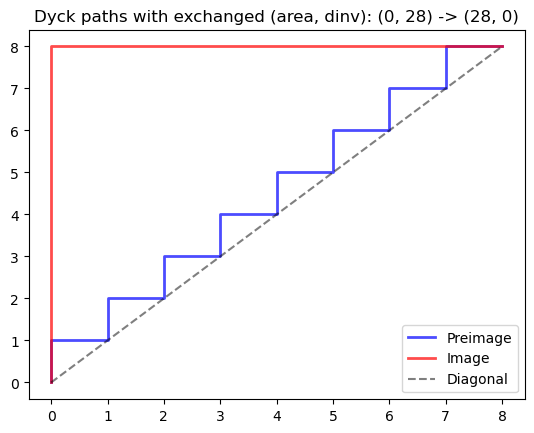

In [5]:
# choose an example index
ex_idx = 0

preimage = word_to_path(df.iloc[ex_idx]['preimage'])
image = word_to_path(df.iloc[ex_idx]['image'])
plt.plot(preimage[0], preimage[1], 'b-', label='Preimage', linewidth=2, alpha=0.7)
plt.plot(image[0], image[1], 'r-', label='Image', linewidth=2, alpha=0.7)
plt.plot([0, n], [0, n], 'k--', label='Diagonal', alpha=0.5)
plt.title(f"Dyck paths with exchanged (area, dinv): {df.iloc[ex_idx]['(area, dinv)']}")
plt.legend()
plt.show()